In [147]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('company_stock.csv', index_col = 'Date', parse_dates=True)
close_px = df['Close']#assign close price 
close_px.shift(-1)
rets = close_px.shift(1) / close_px - 1#obtain the daily rate of return
rets = close_px / close_px.shift(-1) - 1 
rets.head()
df['Rate_of_Return'] = rets #add rets to df as a column
df
df1 = df.loc[:,['Close','Rate_of_Return','Company_ticker','Dis_category']]
df1

,Close,Rate_of_Return,Company_ticker,Dis_category
Date,,,,
2017-10-24,26.23,-0.017235,FOXA,Studio_Entertainment
2017-10-23,26.69,-0.029455,FOXA,Studio_Entertainment
2017-10-20,27.50,0.004750,FOXA,Studio_Entertainment
2017-10-19,27.37,0.006990,FOXA,Studio_Entertainment
2017-10-18,27.18,0.011161,FOXA,Studio_Entertainment
2017-10-17,26.88,0.007119,FOXA,Studio_Entertainment
2017-10-16,26.69,0.006410,FOXA,Studio_Entertainment
2017-10-13,26.52,0.014537,FOXA,Studio_Entertainment
2017-10-12,26.14,0.001149,FOXA,Studio_Entertainment


In [148]:
test = pd.DataFrame(df1).reset_index()
df1_pivot = test.pivot(index = 'Date', columns = 'Company_ticker', values = 'Close')
df1_pivot = df1_pivot.dropna(how = 'all')
df1_pivot.head()

Company_ticker,AAL,AMCX,AMD,AMZN,BOALF,BT,CBS,CCO,CMCSA,DIS,...,SBUX,SEAS,SIX,SNE,T,TGT,TSN,TWX,VIAB,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2007-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.49,NaN
2007-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.38,NaN
2007-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.47,NaN
2007-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.44,NaN
2007-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.29,NaN


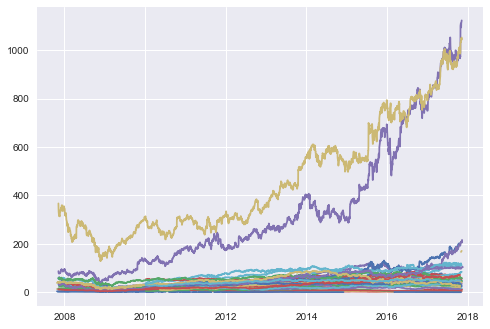

In [149]:
plt.plot(df1_pivot)
plt.show()

In [150]:
df2_pivot = test.pivot(index = 'Date', columns = 'Company_ticker', values = 'Rate_of_Return')
df2_pivot = df2_pivot.dropna(how = 'all')
df2_pivot = df2_pivot['2010-01-01':'2017-12-24']
df2_pivot.head()

Company_ticker,AAL,AMCX,AMD,AMZN,BOALF,BT,CBS,CCO,CMCSA,DIS,...,SBUX,SEAS,SIX,SNE,T,TGT,TSN,TWX,VIAB,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-0.001449,NaN,0.002066,-0.004609,NaN,0.023919,-0.770900,-0.771979,-0.559190,-0.005581,...,0.000000,NaN,NaN,-0.475358,4.149550,0.003721,-0.749898,-0.603569,0.008409,0.220958
2010-01-05,0.082729,NaN,0.001031,0.005900,NaN,0.017071,-0.004912,0.004748,-0.014134,-0.002495,...,0.023417,NaN,NaN,-0.004664,-0.004899,0.003708,0.018791,-0.011343,0.002001,0.001929
2010-01-06,-0.029937,NaN,-0.014418,-0.018116,NaN,0.022085,-0.031735,-0.000945,-0.007168,-0.005314,...,-0.007627,NaN,NaN,-0.001004,-0.029184,0.019085,0.050521,-0.002510,-0.004993,-0.042669
2010-01-07,0.017503,NaN,-0.010449,-0.017013,NaN,-0.017286,0.019665,0.002838,0.021661,0.000314,...,-0.002562,NaN,NaN,-0.001675,-0.011228,0.012284,0.017557,-0.010424,0.010371,-0.005697
2010-01-08,-0.017202,NaN,-0.004224,0.027077,NaN,0.004398,0.010714,0.055660,-0.003534,0.001571,...,-0.003425,NaN,NaN,0.020470,-0.007326,-0.003979,-0.002251,0.001453,-0.005298,0.000337


In [151]:
df3 = df1.loc[df1['Dis_category'] == 'Studio_Entertainment'] #focus on companies in the field of studio entertainment 
df3.head()

,Close,Rate_of_Return,Company_ticker,Dis_category
Date,,,,
2017-10-24,26.23,-0.017235,FOXA,Studio_Entertainment
2017-10-23,26.69,-0.029455,FOXA,Studio_Entertainment
2017-10-20,27.50,0.004750,FOXA,Studio_Entertainment
2017-10-19,27.37,0.006990,FOXA,Studio_Entertainment
2017-10-18,27.18,0.011161,FOXA,Studio_Entertainment


In [152]:
test2 = pd.DataFrame(df3).reset_index()
df3_pivot = test2.pivot(index = 'Date', columns = 'Company_ticker', values = 'Close')
df3_pivot = df3_pivot.dropna(how = 'all')
df3_pivot.head()

Company_ticker,AMCX,CMCSA,FOXA,SNE,TWX,VIAB
Date,,,,,,
2007-10-25,NaN,NaN,NaN,NaN,NaN,38.49
2007-10-26,NaN,NaN,NaN,NaN,NaN,39.38
2007-10-29,NaN,NaN,NaN,NaN,NaN,40.47
2007-10-30,NaN,NaN,NaN,NaN,NaN,40.44
2007-10-31,NaN,NaN,NaN,NaN,NaN,41.29


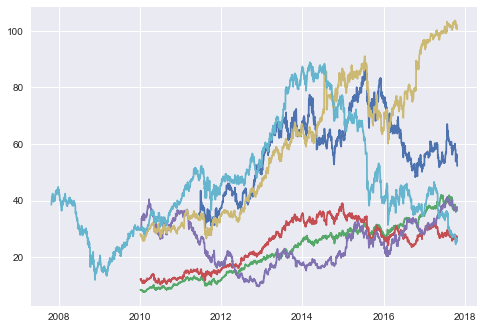

In [153]:
plt.plot(df3_pivot)
l1 = plt.plot()
plt.show()